## ***KLASIFIKASI KANKER SERVIKS DARI CITRA PAP-SMEAR BERBASIS ARSITEKTUR GOOGLENET CONVOLUTIONAL NEURAL NETWORK (CNN)***








## ***Nama Kelompok*** 
1. Eka Maria Sidauruk   (081911733009)
2. Mustikaningrum       (081911733010)
3. Arel Maratun Nadiroh (081911733015)
4. Melyna Wahyudi       (081911733017)
5. Winanda Reza Aulia   (081911733019)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ***Data Acquisition***

In [ ]:
import numpy as np # linear algebra
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Dataset/dataset_smear'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/209565409-209565600-001.BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/157223321-157223341-001.BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/157222801-157222844-001.BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/157185677-157185690-001(1).BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/157185677-157185690-001.BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/158989297-158989324-001.BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/209522940-209522970-001.BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/157223549-157223570-001.BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/209522474-209522554-001.BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/209565864-209565950-001.BMP
/content/drive/MyDrive/Dataset/dataset_smear/normal_intermediate/20

In [ ]:
import torch
import torch.nn.functional as F
import torchvision
from torchvision import datasets,transforms
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
from torch import tensor

## ***Data Exploration***

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
IMGSIZE = 90
transform1 = transforms.Compose([transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(0.2),
                                transforms.ToTensor(),
                                transforms.Resize((IMGSIZE,IMGSIZE))
                               ])

In [ ]:
full_data = torchvision.datasets.ImageFolder(root = '/content/drive/MyDrive/Dataset/dataset_smear', transform = transform1)

In [ ]:
len(full_data)

934

In [ ]:
classes = full_data.classes
print("Classes:",classes)
num_classes = len(full_data.classes)
print("Number of Classes:",num_classes)


Classes: ['carcinoma_in_situ', 'light_dysplastic', 'moderate_dysplastic', 'normal_columnar', 'normal_intermediate', 'normal_superficiel', 'severe_dysplastic']
Number of Classes: 7


In [ ]:
train_data, test_data = torch.utils.data.random_split(full_data, [747, 187])  # In 80% & 20% ratio

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = 46, shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data, batch_size = 46, shuffle = True)

In [ ]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image

def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (10, 10))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)
        
        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy() )
        ax.set_title(classes[labels[i]])
        ax.axis('off')

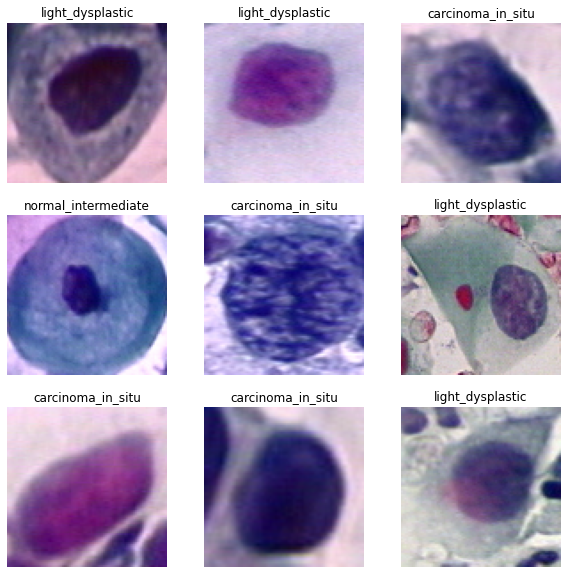

In [ ]:
N_IMAGES = 9

images, labels = zip(*[(image, label) for image, label in [train_data[i] for i in range(N_IMAGES)]])

classes = full_data.classes

plot_images(images, labels, classes)

## ***Modelling -- GoogleNet***

In [ ]:
googlenet = models.googlenet(pretrained=True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth


  0%|          | 0.00/49.7M [00:00<?, ?B/s]

In [ ]:
print(googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

In [ ]:
# Specify model architecture
# Load the pretrained model from pytorch's library and stored it in model_transfer
model_transfer = models.googlenet(pretrained=True)

# Check if GPU is available
use_cuda = torch.cuda.is_available()
if use_cuda:
    model_transfer = model_transfer.cuda()

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
#Lets read the fully connected layer
print(model_transfer.fc.in_features)
print(model_transfer.fc.out_features)

1024
1000


In [ ]:
for param in model_transfer.parameters():
    param.requires_grad=True

In [ ]:
# Define n_inputs takes the same number of inputs from pre-trained model
n_inputs = model_transfer.fc.in_features #refer to the fully connected layer only

# Add last linear layer (n_inputs -> 4 classes). In this case the ouput is 4 classes
# New layer automatically has requires_grad = True
last_layer = nn.Linear(n_inputs, len(classes))

model_transfer.fc = last_layer

# If GPU is available, move the model to GPU
if use_cuda:
    model_transfer = model_transfer.cuda()
  
# Check to see the last layer produces the expected number of outputs
print(model_transfer.fc.out_features)

7


In [ ]:
# Specify loss function and optimizer
criter = nn.CrossEntropyLoss()
optimz = torch.optim.Adam(googlenet.parameters(),lr=1e-5,weight_decay=1e-5)

In [ ]:
TrainLoss = []
TrainAcc = []
TestLoss = []
TestAcc = []
num_epochs = 100

In [ ]:
# Train the model
total_step = len(train_loader)

for epoch in range(num_epochs):
    trainAcc = 0
    testAcc = 0
    for i, (images, labels) in enumerate(train_loader):
        googlenet.train()
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = googlenet(images)
        trainloss = criter(outputs, labels)
        
        # Backward and optimize
        optimz.zero_grad()
        trainloss.backward()
        optimz.step()
        
        # Checking accuracy
        preds = outputs.data.max(dim=1,keepdim=True)[1]
        trainAcc += preds.eq(labels.data.view_as(preds)).cpu().sum()
    
    trainAcc = trainAcc/len(train_loader.dataset) * 100
    
    for i, (images, labels) in enumerate(test_loader):
        googlenet.eval()
        images = images.to(device)
        labels = labels.to(device)
    
        # Forward pass
        outputs = googlenet(images)
        testloss = criter(outputs, labels)
    
        # Checking accuracy
        preds = outputs.data.max(dim=1,keepdim=True)[1]
        testAcc += preds.eq(labels.data.view_as(preds)).cpu().sum()
    
    testAcc = testAcc/len(test_loader.dataset) * 100
    
    print("Epoch {} =>  Train Loss : {trainloss:.2f};   Train Accuracy : {trainAcc:.2f}%;   Test Loss : {testloss:.2f};   Test Accuracy : {testAcc:.2f}%".format(epoch+1, trainloss=trainloss.item(), trainAcc=trainAcc, testloss=testloss.item(), testAcc=testAcc))
  
    TrainLoss.append(trainloss)
    TrainAcc.append(trainAcc)

    TestLoss.append(testloss)
    TestAcc.append(testAcc)

Epoch 1 =>  Train Loss : 8.11;   Train Accuracy : 0.13%;   Test Loss : 9.35;   Test Accuracy : 0.00%
Epoch 2 =>  Train Loss : 8.09;   Train Accuracy : 0.27%;   Test Loss : 8.77;   Test Accuracy : 0.00%
Epoch 3 =>  Train Loss : 8.21;   Train Accuracy : 0.40%;   Test Loss : 8.84;   Test Accuracy : 0.00%
Epoch 4 =>  Train Loss : 7.67;   Train Accuracy : 0.54%;   Test Loss : 9.19;   Test Accuracy : 0.00%
Epoch 5 =>  Train Loss : 8.02;   Train Accuracy : 1.07%;   Test Loss : 9.62;   Test Accuracy : 0.00%
Epoch 6 =>  Train Loss : 7.78;   Train Accuracy : 1.47%;   Test Loss : 6.11;   Test Accuracy : 0.00%
Epoch 7 =>  Train Loss : 6.66;   Train Accuracy : 3.21%;   Test Loss : 8.30;   Test Accuracy : 0.53%
Epoch 8 =>  Train Loss : 6.97;   Train Accuracy : 3.35%;   Test Loss : 7.23;   Test Accuracy : 2.14%
Epoch 9 =>  Train Loss : 5.31;   Train Accuracy : 5.49%;   Test Loss : 6.06;   Test Accuracy : 2.14%
Epoch 10 =>  Train Loss : 5.06;   Train Accuracy : 7.23%;   Test Loss : 5.64;   Test Accura

In [ ]:
# Save the model checkpoint
torch.save(googlenet.state_dict(), 'GoogleNetModel.ckpt')

## ***Evaluation***

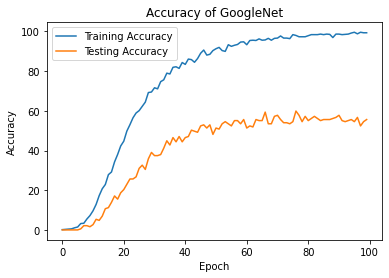

In [ ]:
plt.plot(range(100),TrainAcc)
plt.plot(range(100),TestAcc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.title("Accuracy of GoogleNet")
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.show()

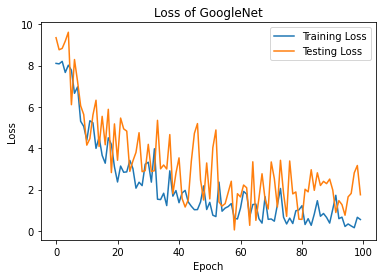

In [ ]:
with torch.no_grad():
    plt.plot(range(100),TrainLoss)
    plt.plot(range(100),TestLoss)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.title("Loss of GoogleNet")
    plt.legend(["Training Loss", "Testing Loss"])
    plt.show()